In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [2]:
df=pd.read_csv('/kaggle/input/auto-insurance-claims-data/insurance_claims.csv')

In [3]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [4]:
df.replace('?',np.nan,inplace=True)

In [5]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
df['collision_type'].unique()

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

In [9]:
import missingno as msno

In [10]:
msno.matrix(df)

<AxesSubplot:>

<AxesSubplot:>

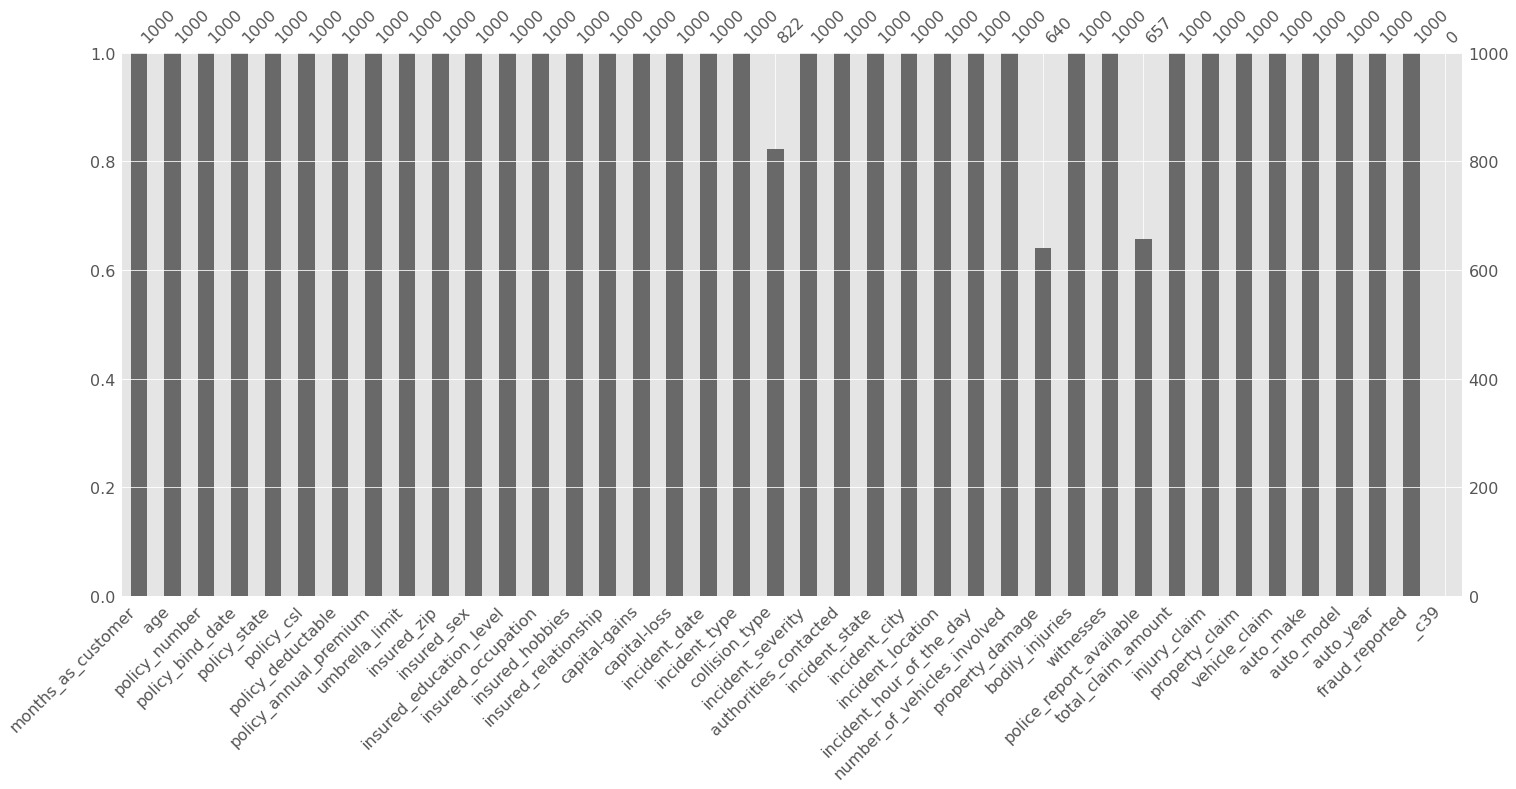

In [11]:
msno.bar(df)

In [12]:
df['collision_type'].mode()[0]

'Rear Collision'

In [13]:
df['collision_type']=df['collision_type'].fillna(df['collision_type'].mode()[0])

In [14]:


df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [15]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot:>

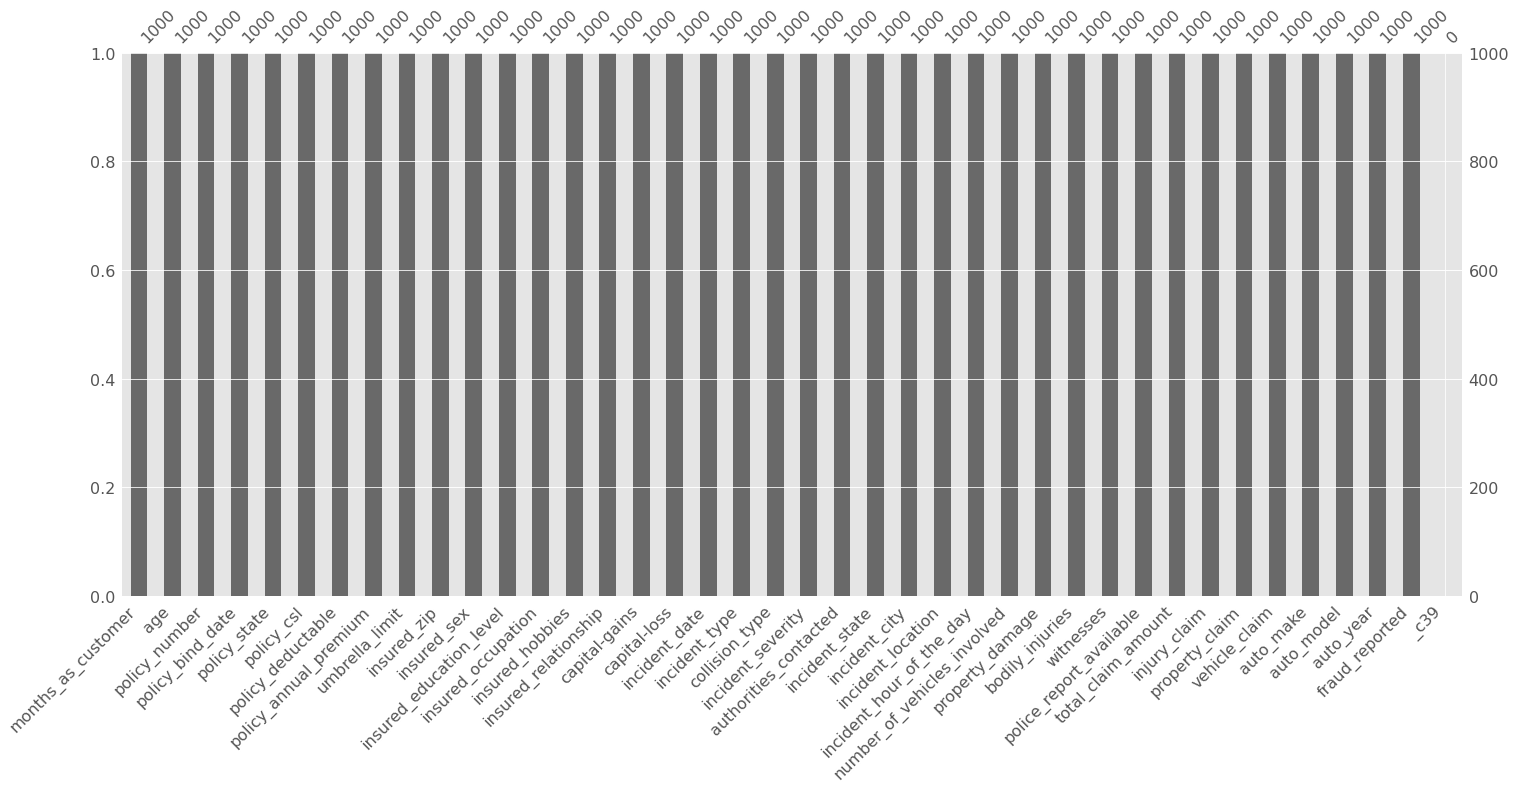

In [16]:
msno.bar(df)

In [17]:
msno.matrix(df)

<AxesSubplot:>

<AxesSubplot:>

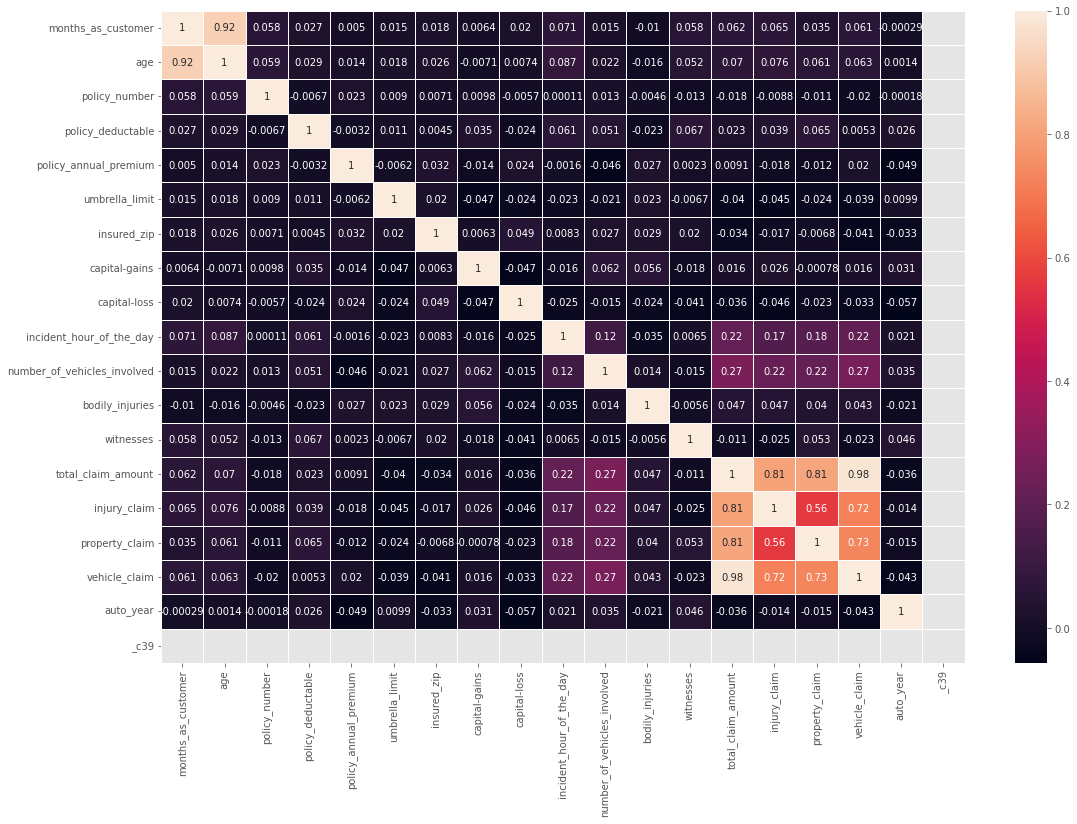

In [18]:
plt.figure(figsize=(18,12))
corr=df.corr()
sns.heatmap(data=corr,annot=True,fmt='.2g',linewidth=1)

In [19]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [20]:
pd.set_option('display.max_columns', None)
df.head()


months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    2015-01-25  Single Vehicle Collision   Side Collision      Major Damage   
1    2015-01-21             Vehicle Theft   Rear Collision      Minor Damage   
2    2015-02-22   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    2015-01-10  Single Vehicle Collision  Front Collision      Major Damage   
4    2015-02-17             Vehicle Theft   Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   
2                         7                            3              NO   
3                         5                            1              NO   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                      NO                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [22]:
df['fraud_reported']=df['fraud_reported'].map({'Y':1,'N':0})

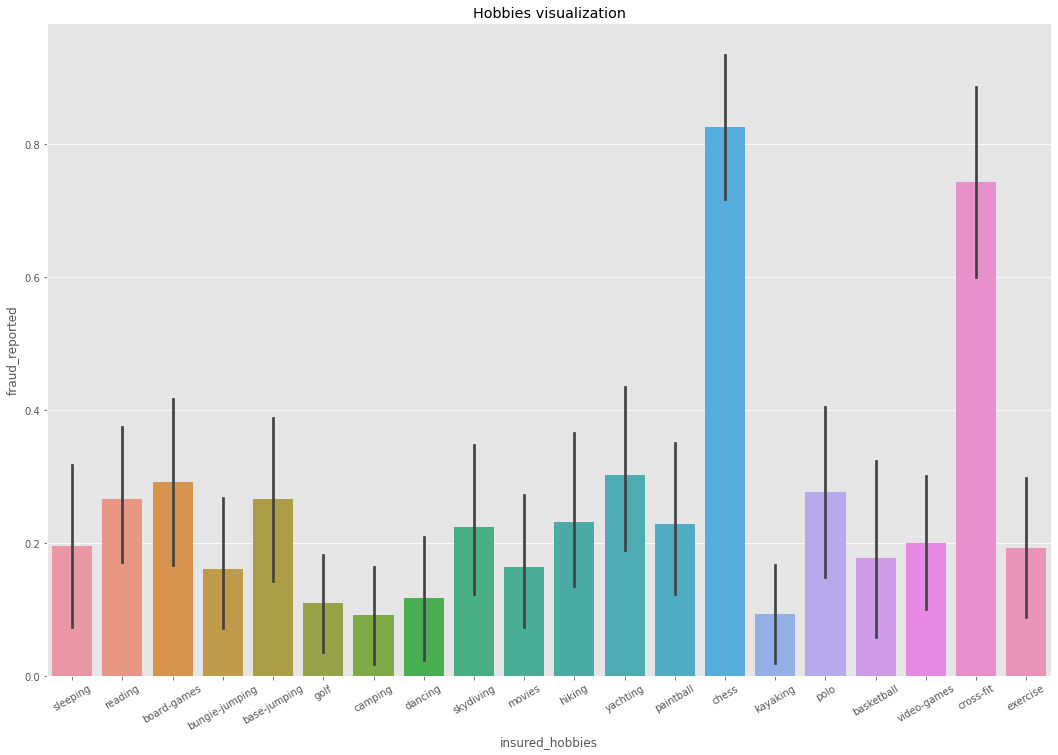

In [23]:
plt.figure(figsize=(18,12))
hobbies_plot=sns.barplot(x = "insured_hobbies", y = "fraud_reported", data = df)
hobbies_plot.set_xticklabels(hobbies_plot.get_xticklabels(),rotation=30)
hobbies_plot.set(title='Hobbies visualization')
plt.show()

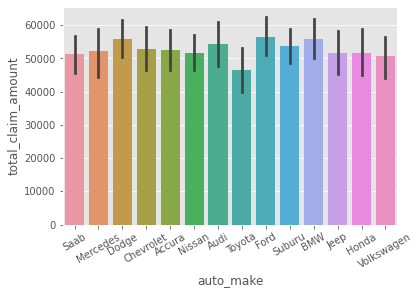

In [24]:
tca_plot=sns.barplot(x = "auto_make", y = "total_claim_amount", data = df)
tca_plot.set_xticklabels(tca_plot.get_xticklabels(),rotation=30)
plt.show()

In [25]:
xticklabels=tca_plot.get_xticklabels()
tca_count_plot=sns.catplot(x = "auto_make", kind="count", data = df)
tca_count_plot.set_xticklabels(xticklabels,rotation=30)
plt.show()

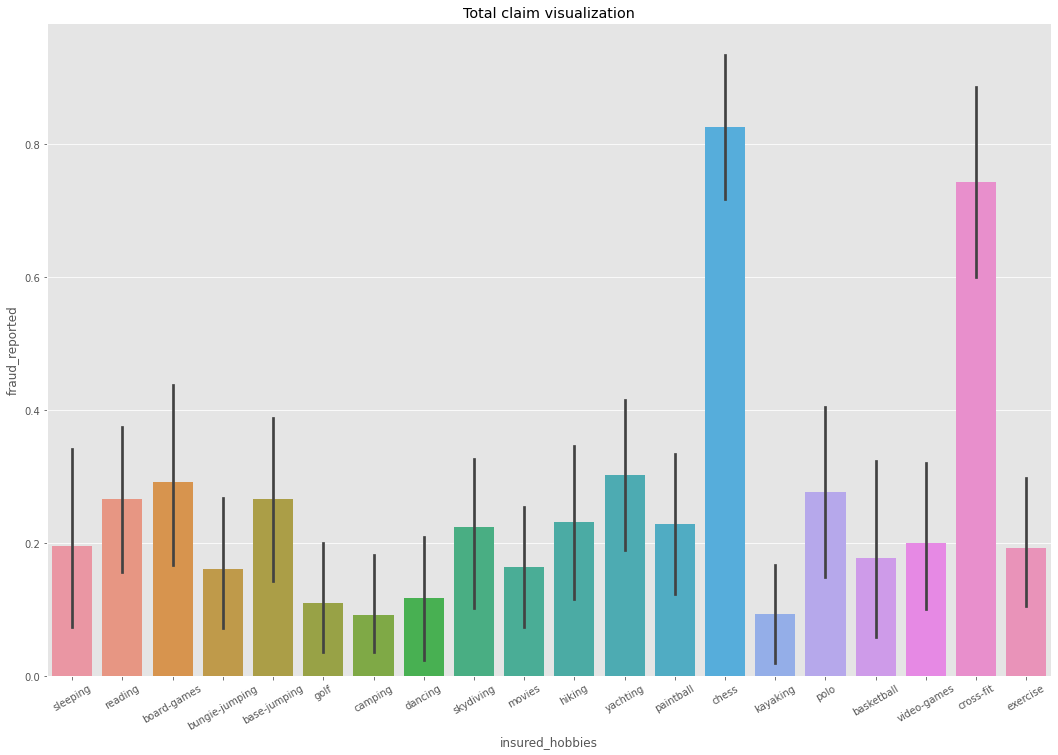

In [26]:
plt.figure(figsize=(18,12))
hobbies_plot=sns.barplot(x = "insured_hobbies", y = "fraud_reported", data = df)
hobbies_plot.set_xticklabels(hobbies_plot.get_xticklabels(),rotation=30)
hobbies_plot.set(title='Total claim visualization')
plt.show()

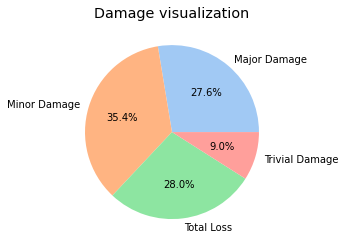

In [27]:
severity_index=df.groupby(['incident_severity']).size().index
severity_values=df.groupby(['incident_severity']).size().values
colors=sns.color_palette('pastel')
plt.pie(x=severity_values,labels=severity_index,colors=colors,autopct='%.1f%%')
plt.title('Damage visualization')
plt.show()

In [28]:

to_drop=['policy_number','auto_make','auto_model','auto_year','_c39','incident_state','incident_city', 'incident_location', 'incident_date','insured_zip','policy_number','policy_bind_date','policy_state']
df.drop(to_drop,inplace=True, axis=1)


In [29]:
df.head()

months_as_customer  age policy_csl  policy_deductable  \
0                 328   48    250/500               1000   
1                 228   42    250/500               2000   
2                 134   29    100/300               2000   
3                 256   41    250/500               2000   
4                 228   44   500/1000               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_hobbies insured_relationship  capital-gains  \
0       craft-repair        sleeping              husband          53300   
1  machine-op-inspct         reading       other-relative              0   
2              sales     board-games            own-child          35100   
3       armed-forces     board-games            unmarried          48900   
4              sales     board-games            unmarried          66000   

   capital-loss             incident_type   collision_type incident_severity  \
0             0  Single Vehicle Collision   Side Collision      Major Damage   
1             0             Vehicle Theft   Rear Collision      Minor Damage   
2             0   Multi-vehicle Collision   Rear Collision      Minor Damage   
3        -62400  Single Vehicle Collision  Front Collision      Major Damage   
4        -46000             Vehicle Theft   Rear Collision      Minor Damage   

  authorities_contacted  incident_hour_of_the_day  \
0                Police                         5   
1                Police                         8   
2                Police                         7   
3                Police                         5   
4                  None                        20   

   number_of_vehicles_involved property_damage  bodily_injuries  witnesses  \
0                            1             YES                1          2   
1                            1              NO                0          0   
2                            3              NO                2          3   
3                            1              NO                1          2   
4                            1              NO                0          1   

  police_report_available  total_claim_amount  injury_claim  property_claim  \
0                     YES               71610          6510           13020   
1                      NO                5070           780             780   
2                      NO               34650          7700            3850   
3                      NO               63400          6340            6340   
4                      NO                6500          1300             650   

   vehicle_claim  fraud_reported  
0          52080               1  
1           3510               1  
2          23100               0  
3          50720               1  
4           4550               0

In [30]:

np.triu(np.ones_like(corr,dtype=bool))

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False, False, False,  T

<AxesSubplot:>

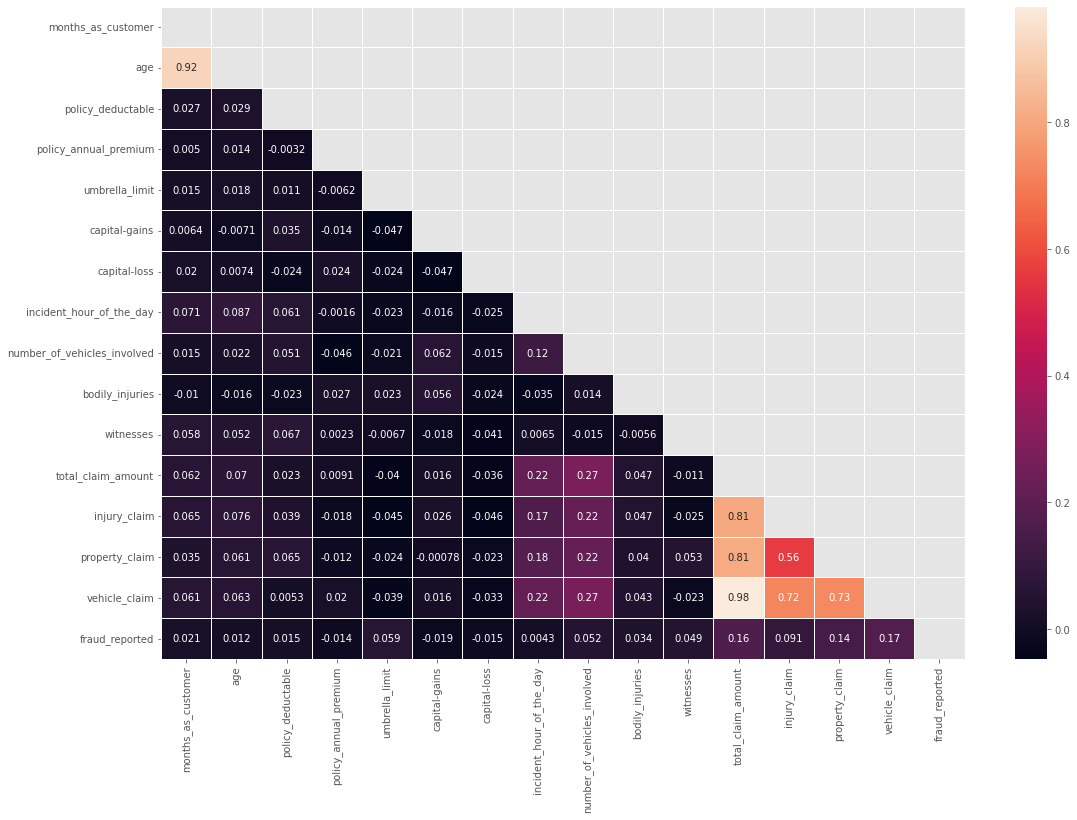

In [31]:
plt.figure(figsize=(18,12))
corr=df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(data=corr,annot=True,mask=mask,fmt='.2g',linewidth=1)

In [32]:
df.drop(columns=['age','total_claim_amount'],axis=1,inplace=True)

In [33]:
df.head()

months_as_customer policy_csl  policy_deductable  policy_annual_premium  \
0                 328    250/500               1000                1406.91   
1                 228    250/500               2000                1197.22   
2                 134    100/300               2000                1413.14   
3                 256    250/500               2000                1415.74   
4                 228   500/1000               1000                1583.91   

   umbrella_limit insured_sex insured_education_level insured_occupation  \
0               0        MALE                      MD       craft-repair   
1         5000000        MALE                      MD  machine-op-inspct   
2         5000000      FEMALE                     PhD              sales   
3         6000000      FEMALE                     PhD       armed-forces   
4         6000000        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

              incident_type   collision_type incident_severity  \
0  Single Vehicle Collision   Side Collision      Major Damage   
1             Vehicle Theft   Rear Collision      Minor Damage   
2   Multi-vehicle Collision   Rear Collision      Minor Damage   
3  Single Vehicle Collision  Front Collision      Major Damage   
4             Vehicle Theft   Rear Collision      Minor Damage   

  authorities_contacted  incident_hour_of_the_day  \
0                Police                         5   
1                Police                         8   
2                Police                         7   
3                Police                         5   
4                  None                        20   

   number_of_vehicles_involved property_damage  bodily_injuries  witnesses  \
0                            1             YES                1          2   
1                            1              NO                0          0   
2                            3              NO                2          3   
3                            1              NO                1          2   
4                            1              NO                0          1   

  police_report_available  injury_claim  property_claim  vehicle_claim  \
0                     YES          6510           13020          52080   
1                      NO           780             780           3510   
2                      NO          7700            3850          23100   
3                      NO          6340            6340          50720   
4                      NO          1300             650           4550   

   fraud_reported  
0               1  
1               1  
2               0  
3               1  
4               0

<AxesSubplot:>

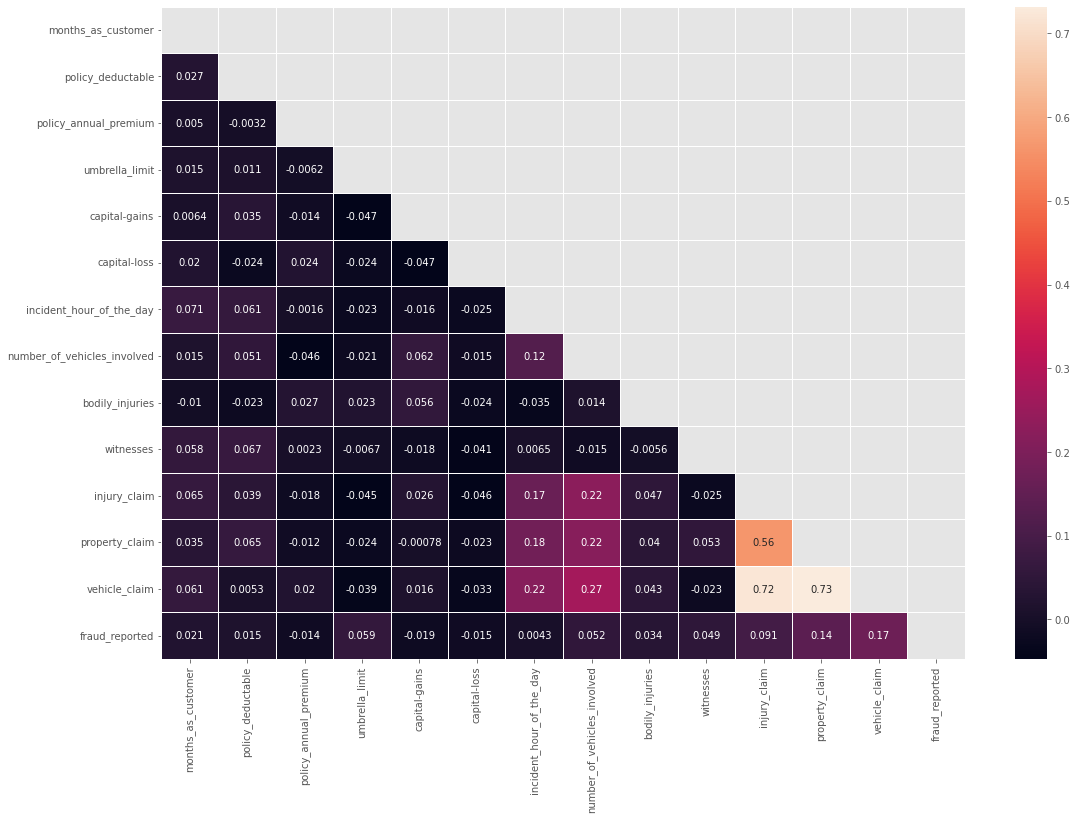

In [34]:
plt.figure(figsize=(18,12))
corr=df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(data=corr,annot=True,mask=mask,fmt='.2g',linewidth=1)

In [35]:
X=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

In [36]:
cat_df=X.select_dtypes(include=['object'])
cat_df.head()

policy_csl insured_sex insured_education_level insured_occupation  \
0    250/500        MALE                      MD       craft-repair   
1    250/500        MALE                      MD  machine-op-inspct   
2    100/300      FEMALE                     PhD              sales   
3    250/500      FEMALE                     PhD       armed-forces   
4   500/1000        MALE               Associate              sales   

  insured_hobbies insured_relationship             incident_type  \
0        sleeping              husband  Single Vehicle Collision   
1         reading       other-relative             Vehicle Theft   
2     board-games            own-child   Multi-vehicle Collision   
3     board-games            unmarried  Single Vehicle Collision   
4     board-games            unmarried             Vehicle Theft   

    collision_type incident_severity authorities_contacted property_damage  \
0   Side Collision      Major Damage                Police             YES   
1   Rear Collision      Minor Damage                Police              NO   
2   Rear Collision      Minor Damage                Police              NO   
3  Front Collision      Major Damage                Police              NO   
4   Rear Collision      Minor Damage                  None              NO   

  police_report_available  
0                     YES  
1                      NO  
2                      NO  
3                      NO  
4                      NO

In [37]:
for col in cat_df.columns:
    print(f"{col} : \n{cat_df[col].unique()}\n")

policy_csl : 
['250/500' '100/300' '500/1000']

insured_sex : 
['MALE' 'FEMALE']

insured_education_level : 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation : 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_hobbies : 
['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']

insured_relationship : 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type : 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type : 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity : 
['Major Damage' 'Min

In [38]:
cat_df=pd.get_dummies(cat_df,drop_first=True)
cat_df.head()

policy_csl_250/500  policy_csl_500/1000  insured_sex_MALE  \
0                   1                    0                 1   
1                   1                    0                 1   
2                   0                    0                 0   
3                   1                    0                 0   
4                   0                    1                 1   

   insured_education_level_College  insured_education_level_High School  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    0   
4                                0                                    0   

   insured_education_level_JD  insured_education_level_MD  \
0                           0                           1   
1                           0                           1   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   insured_education_level_Masters  insured_education_level_PhD  \
0                                0                            0   
1                                0                            0   
2                                0                            1   
3                                0                            1   
4                                0                            0   

   insured_occupation_armed-forces  insured_occupation_craft-repair  \
0                                0                                1   
1                                0                                0   
2                                0                                0   
3                                1                                0   
4                                0                                0   

   insured_occupation_exec-managerial  insured_occupation_farming-fishing  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   
3                                   0                                   0   
4                                   0                                   0   

   insured_occupation_handlers-cleaners  insured_occupation_machine-op-inspct  \
0                                     0                                     0   
1                                     0                                     1   
2                                     0                                     0   
3                                     0                                     0   
4                                     0                                     0   

   insured_occupation_other-service  insured_occupation_priv-house-serv  \
0                                 0                                   0   
1                                 0                                   0   
2                                 0                                   0   
3                                 0                                   0   
4                                 0                                   0   

   insured_occupation_prof-specialty  insured_occupation_protective-serv  \
0                                  0                                   0   
1                                  0                                   0   
2                                  0                                   0   
3                                  0                                   0   
4                                  0                                   0   

   insured_occupation_sales  insured_occupation_tech-support  \
0                         0                     

In [39]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   policy_csl_250/500                      1000 non-null   uint8
 1   policy_csl_500/1000                     1000 non-null   uint8
 2   insured_sex_MALE                        1000 non-null   uint8
 3   insured_education_level_College         1000 non-null   uint8
 4   insured_education_level_High School     1000 non-null   uint8
 5   insured_education_level_JD              1000 non-null   uint8
 6   insured_education_level_MD              1000 non-null   uint8
 7   insured_education_level_Masters         1000 non-null   uint8
 8   insured_education_level_PhD             1000 non-null   uint8
 9   insured_occupation_armed-forces         1000 non-null   uint8
 10  insured_occupation_craft-repair         1000 non-null   uint8
 11  insured_occupation

In [40]:
num_df=X.select_dtypes(include=['int64'])
num_df.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
0                 328               1000               0          53300   
1                 228               2000         5000000              0   
2                 134               2000         5000000          35100   
3                 256               2000         6000000          48900   
4                 228               1000         6000000          66000   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0             0                         5                            1   
1             0                         8                            1   
2             0                         7                            3   
3        -62400                         5                            1   
4        -46000                        20                            1   

   bodily_injuries  witnesses  injury_claim  property_claim  vehicle_claim  
0                1          2          6510           13020          52080  
1                0          0           780             780           3510  
2                2          3          7700            3850          23100  
3                1          2          6340            6340          50720  
4                0          1          1300             650           4550

In [41]:
X=pd.concat([num_df,cat_df],axis=1)

In [42]:
X.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
0                 328               1000               0          53300   
1                 228               2000         5000000              0   
2                 134               2000         5000000          35100   
3                 256               2000         6000000          48900   
4                 228               1000         6000000          66000   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0             0                         5                            1   
1             0                         8                            1   
2             0                         7                            3   
3        -62400                         5                            1   
4        -46000                        20                            1   

   bodily_injuries  witnesses  injury_claim  property_claim  vehicle_claim  \
0                1          2          6510           13020          52080   
1                0          0           780             780           3510   
2                2          3          7700            3850          23100   
3                1          2          6340            6340          50720   
4                0          1          1300             650           4550   

   policy_csl_250/500  policy_csl_500/1000  insured_sex_MALE  \
0                   1                    0                 1   
1                   1                    0                 1   
2                   0                    0                 0   
3                   1                    0                 0   
4                   0                    1                 1   

   insured_education_level_College  insured_education_level_High School  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    0   
4                                0                                    0   

   insured_education_level_JD  insured_education_level_MD  \
0                           0                           1   
1                           0                           1   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   insured_education_level_Masters  insured_education_level_PhD  \
0                                0                            0   
1                                0                            0   
2                                0                            1   
3                                0                            1   
4                                0                            0   

   insured_occupation_armed-forces  insured_occupation_craft-repair  \
0                                0                                1   
1                                0                                0   
2                                0                                0   
3                                1                                0   
4                                0                                0   

   insured_occupation_exec-managerial  insured_occupation_farming-fishing  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   
3                                   0                                   0   
4                                   0                                   0   

   insured_occupation_handlers-cleaners  insured_occupation_machine-op-inspct  \
0                                     0                      

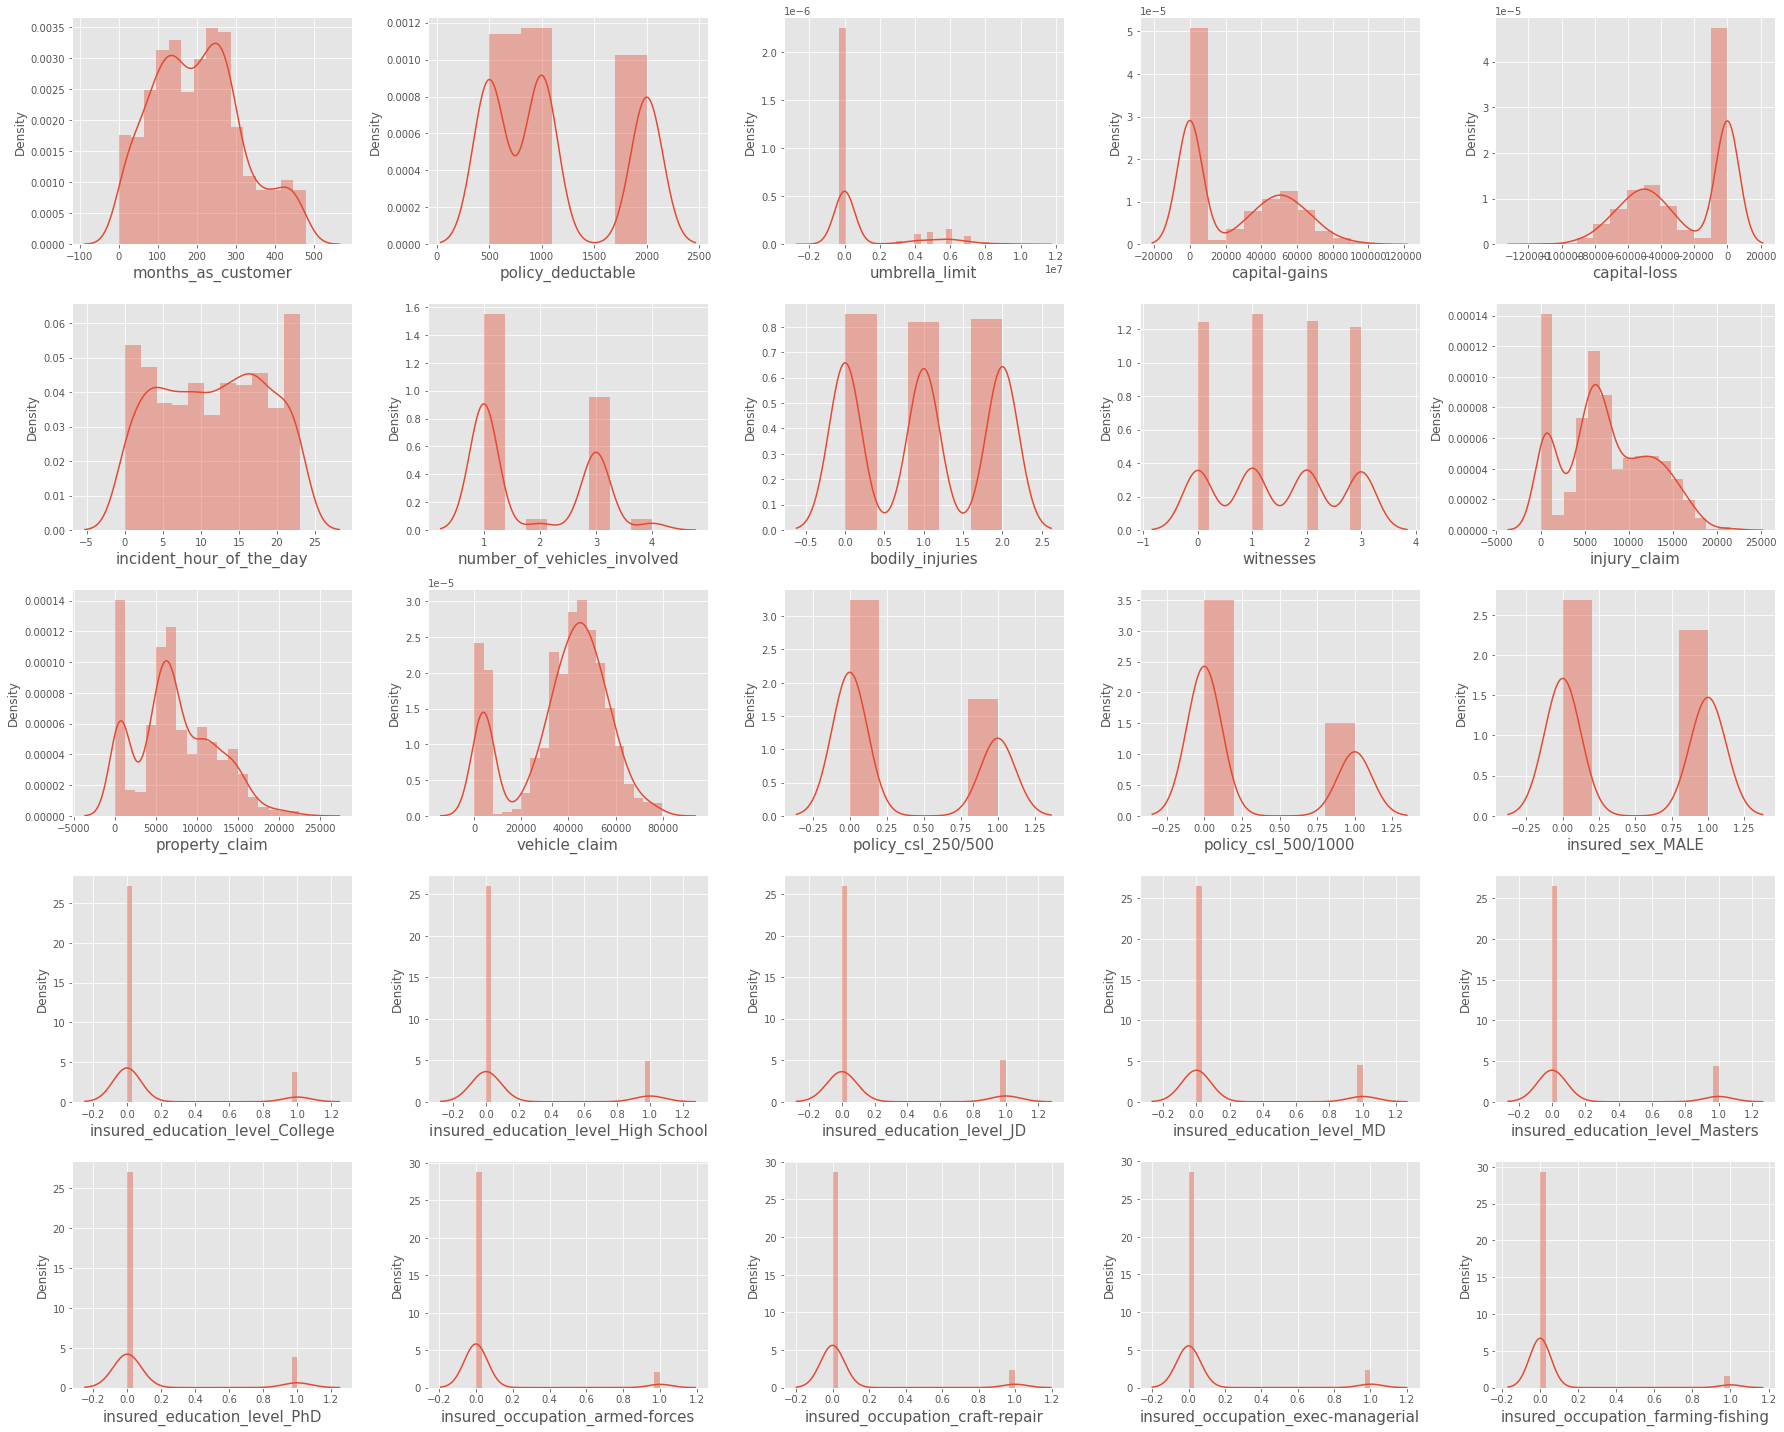

In [43]:
plt.figure(figsize=(25,20))
plot_number=1
for col in X.columns:
    if plot_number<=25:
        plt.subplot(5,5,plot_number)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=15)    
    plot_number+=1
plt.tight_layout()

In [44]:
len(X.columns)

72

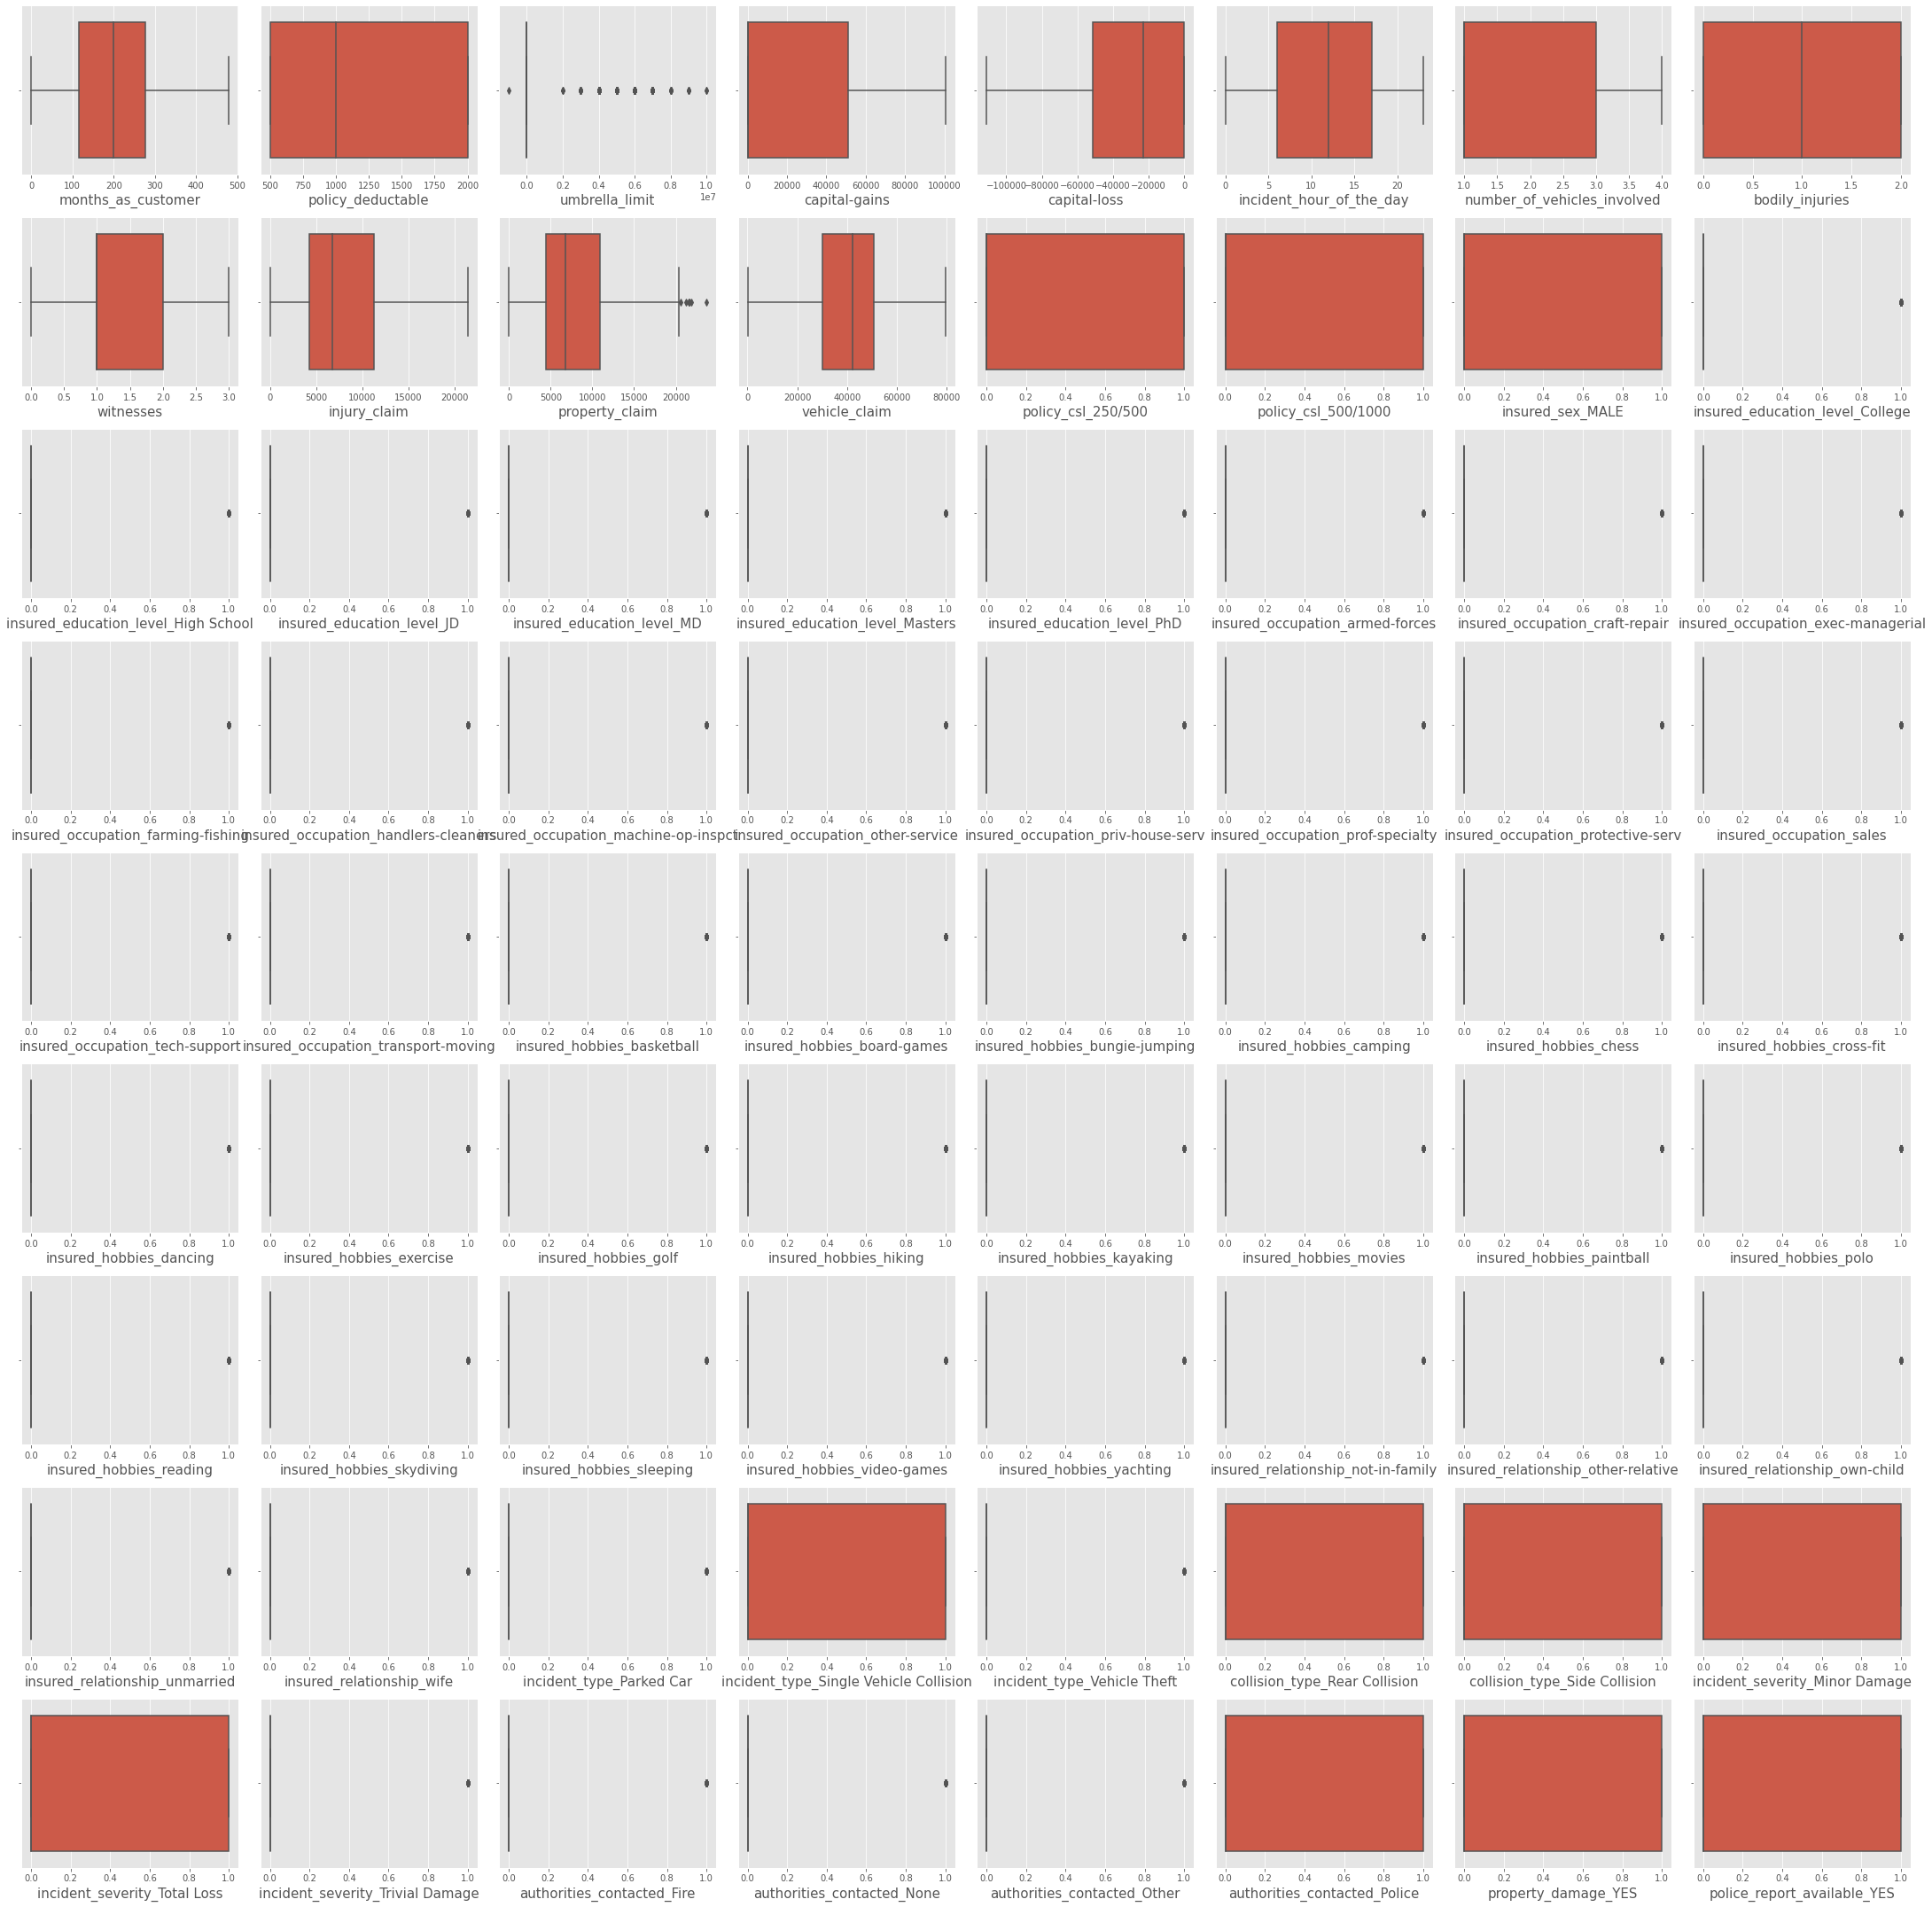

In [45]:
plt.figure(figsize=(30,30))
plot_number=1
for col in X.columns:
    if plot_number<=72:
        plt.subplot(9,8,plot_number)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=15)    
    plot_number+=1
plt.tight_layout()

In [46]:
X['policy_csl_250/500'].describe()

count    1000.000000
mean        0.351000
std         0.477522
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: policy_csl_250/500, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [48]:
X_train.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
846                 285                500               0          63100   
666                 344               1000               0              0   
640                 182               2000               0          53800   
212                 335               1000         6000000          62200   
700                  85               2000         9000000              0   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
846        -79400                        13                            1   
666        -38700                        18                            3   
640        -78300                        18                            1   
212        -31400                        12                            3   
700             0                         1                            2   

     bodily_injuries  witnesses  injury_claim  property_claim  vehicle_claim  \
846                0          3          5270           10540          36890   
666                2          2         17400           11600          46400   
640                2          3          8150           16300          65200   
212                2          3          8580            4290          21450   
700                2          1         14880            7440          52080   

     policy_csl_250/500  policy_csl_500/1000  insured_sex_MALE  \
846                   0                    0                 1   
666                   0                    0                 0   
640                   0                    1                 0   
212                   0                    0                 1   
700                   1                    0                 0   

     insured_education_level_College  insured_education_level_High School  \
846                                0                                    0   
666                                0                                    0   
640                                0                                    0   
212                                0                                    1   
700                                0                                    0   

     insured_education_level_JD  insured_education_level_MD  \
846                           0                           0   
666                           0                           0   
640                           0                           0   
212                           0                           0   
700                           0                           1   

     insured_education_level_Masters  insured_education_level_PhD  \
846                                0                            0   
666                                1                            0   
640                                1                            0   
212                                0                            0   
700                                0                            0   

     insured_occupation_armed-forces  insured_occupation_craft-repair  \
846                                0                                0   
666                                0                                0   
640                                1                                0   
212                                0                                0   
700                                0                                0   

     insured_occupation_exec-managerial  insured_occupation_farming-fishing  \
846                                   0                                   0   
666                                   0                                   0   
640                                   0                                   0   
212                                   0                                   0   
700                                   0                                   0   

     insured_occupation_handlers-cle

In [49]:
num_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data= scaler.fit_transform(num_df)

In [51]:
scaled_data

array([[ 0.71914215, -1.02660227, -0.48256428, ..., -0.46818643,
         0.66459823, -0.06927405],
       [ 1.23911863, -0.20750471, -0.48256428, ...,  2.00939029,
         0.88785241,  0.43914531],
       [-0.18861339,  1.43069039, -0.48256428, ...,  0.12005932,
         1.87775305,  1.44422248],
       ...,
       [-0.40012924, -0.20750471,  0.81155923, ..., -0.80111718,
        -0.02201371, -0.67927036],
       [ 0.19035252, -0.20750471,  1.67430824, ...,  0.41622472,
         0.4666181 ,  0.01145289],
       [-0.54113981,  1.43069039,  1.67430824, ..., -0.15976591,
         1.30066204,  1.22075319]])

In [52]:
X_train.index

Int64Index([846, 666, 640, 212, 700,  59, 565, 262,  61, 504,
            ...
            820, 478, 327, 411, 673, 905, 618, 570, 468, 214],
           dtype='int64', length=750)

In [53]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
846            0.719142          -1.026602       -0.482564       1.337686   
666            1.239119          -0.207505       -0.482564      -0.899322   
640           -0.188613           1.430690       -0.482564       1.007984   
212            1.159800          -0.207505        2.105683       1.305779   
700           -1.043490           1.430690        3.399806      -0.899322   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
846     -1.853347                  0.194011                    -0.806514   
666     -0.404411                  0.910095                     1.173472   
640     -1.814187                  0.910095                    -0.806514   
212     -0.144528                  0.050794                     1.173472   
700      0.973324                 -1.524590                     0.183479   

     bodily_injuries  witnesses  injury_claim  property_claim  vehicle_claim  
846        -1.200190   1.373349     -0.468186        0.664598      -0.069274  
666         1.242531   0.460218      2.009390        0.887852       0.439145  
640         1.242531   1.373349      0.120059        1.877753       1.444222  
212         1.242531   1.373349      0.207888       -0.651759      -0.894720  
700         1.242531  -0.452913      1.494675        0.011685       0.742807

In [54]:
X_train.drop(columns=scaled_num_df.columns,inplace=True,axis=1)

In [55]:
X_train=pd.concat([X_train,scaled_num_df],axis=1)

In [56]:
X_train.head()

policy_csl_250/500  policy_csl_500/1000  insured_sex_MALE  \
846                   0                    0                 1   
666                   0                    0                 0   
640                   0                    1                 0   
212                   0                    0                 1   
700                   1                    0                 0   

     insured_education_level_College  insured_education_level_High School  \
846                                0                                    0   
666                                0                                    0   
640                                0                                    0   
212                                0                                    1   
700                                0                                    0   

     insured_education_level_JD  insured_education_level_MD  \
846                           0                           0   
666                           0                           0   
640                           0                           0   
212                           0                           0   
700                           0                           1   

     insured_education_level_Masters  insured_education_level_PhD  \
846                                0                            0   
666                                1                            0   
640                                1                            0   
212                                0                            0   
700                                0                            0   

     insured_occupation_armed-forces  insured_occupation_craft-repair  \
846                                0                                0   
666                                0                                0   
640                                1                                0   
212                                0                                0   
700                                0                                0   

     insured_occupation_exec-managerial  insured_occupation_farming-fishing  \
846                                   0                                   0   
666                                   0                                   0   
640                                   0                                   0   
212                                   0                                   0   
700                                   0                                   0   

     insured_occupation_handlers-cleaners  \
846                                     0   
666                                     0   
640                                     0   
212                                     0   
700                                     0   

     insured_occupation_machine-op-inspct  insured_occupation_other-service  \
846                                     0                                 0   
666                                     0                                 0   
640                                     0                                 0   
212                                     0                                 0   
700                                     0                                 0   

     insured_occupation_priv-house-serv  insured_occupation_prof-specialty  \
846                                   1                                  0   
666                                   0                                  0   
640                                   0                                  0   
212                                   0                                  0   
700                                   0                                  0   

     insured_occupation_protective-serv  insured_occupation_sales  \
846                                   0                         0   
666                                   0                         1   
640            

removing outliers

https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8

In [57]:
#balancing data
from imblearn.over_sampling import SMOTE

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X,y)

print("Original dataset shape",y.value_counts())
print("Resample dataset shape",y_smote.value_counts())

# as of now i am not going to use smoted data for further models as i am already going ahead with the non-smotted ones

Original dataset shape 0    753
1    247
Name: fraud_reported, dtype: int64
Resample dataset shape 1    753
0    753
Name: fraud_reported, dtype: int64


In [58]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 420 to 636
Data columns (total 72 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   months_as_customer                      250 non-null    int64
 1   policy_deductable                       250 non-null    int64
 2   umbrella_limit                          250 non-null    int64
 3   capital-gains                           250 non-null    int64
 4   capital-loss                            250 non-null    int64
 5   incident_hour_of_the_day                250 non-null    int64
 6   number_of_vehicles_involved             250 non-null    int64
 7   bodily_injuries                         250 non-null    int64
 8   witnesses                               250 non-null    int64
 9   injury_claim                            250 non-null    int64
 10  property_claim                          250 non-null    int64
 11  vehicle_claim    

In [59]:
from sklearn import metrics

                        **SVM classification**

In [60]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)
print(f"Training accuracy of SVC : {svc_train_acc}")
print(f"Test accuracy of SVC : {svc_test_acc}")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training accuracy of SVC : 0.888
Test accuracy of SVC : 0.76
[[190   0]
 [ 60   0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       190
           1       0.00      0.00      0.00        60

    accuracy                           0.76       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.58      0.76      0.66       250



In [62]:
auc_svc = metrics.roc_auc_score(y_test, y_pred)
false_positive_rate_svc, true_positive_rate_svc, _ = metrics.roc_curve(y_test, y_pred)

                **KNN**

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
knn_train_acc=accuracy_score(y_train,knn.predict(X_train))
knn_test_acc=accuracy_score(y_test,y_pred)
print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training accuracy of KNN is : 0.752
Test accuracy of KNN is : 0.756
[[189   1]
 [ 60   0]]
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       190
           1       0.00      0.00      0.00        60

    accuracy                           0.76       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.58      0.76      0.65       250



In [65]:
auc_knn = metrics.roc_auc_score(y_test, y_pred)
false_positive_rate_knn, true_positive_rate_knn, _ = metrics.roc_curve(y_test, y_pred)

                **Decision Tree Classifier**

In [66]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
dtc_train_acc=accuracy_score(y_train,dtc.predict(X_train))
dtc_test_acc=accuracy_score(y_test,y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.356
[[ 45 145]
 [ 16  44]]
              precision    recall  f1-score   support

           0       0.74      0.24      0.36       190
           1       0.23      0.73      0.35        60

    accuracy                           0.36       250
   macro avg       0.49      0.49      0.36       250
weighted avg       0.62      0.36      0.36       250



In [68]:
from sklearn.model_selection import GridSearchCV
grid_params={
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7,10],
    'min_samples_split':range(2,10,1),
    'min_samples_leaf':range(2,10,1)
}
grid_search=GridSearchCV(dtc,grid_params,cv=5,n_jobs=-1,verbose=1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [69]:
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.852
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2)


In [70]:
dtc=grid_search.best_estimator_
y_pred=dtc.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
dtc_train_acc=accuracy_score(y_train,dtc.predict(X_train))
dtc_test_acc=accuracy_score(y_test,y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training accuracy of Decision Tree is : 0.8773333333333333
Test accuracy of Decision Tree is : 0.3
[[ 29 161]
 [ 14  46]]
              precision    recall  f1-score   support

           0       0.67      0.15      0.25       190
           1       0.22      0.77      0.34        60

    accuracy                           0.30       250
   macro avg       0.45      0.46      0.30       250
weighted avg       0.57      0.30      0.27       250



In [72]:
y_train.value_counts()

0    563
1    187
Name: fraud_reported, dtype: int64

In [73]:
auc_dtc = metrics.roc_auc_score(y_test, y_pred)
false_positive_rate_dtc, true_positive_rate_dtc, _ = metrics.roc_curve(y_test, y_pred)

                        **Random Forest Classifier**

In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='sqrt',min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
rfc_train_acc=accuracy_score(y_train,rfc.predict(X_train))
rfc_test_acc=accuracy_score(y_test,y_pred)

print(f"Training accuracy of Random Forest is : {rfc_train_acc}")
print(f"Test accuracy of Random Forest is : {rfc_test_acc}")

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training accuracy of Random Forest is : 0.968
Test accuracy of Random Forest is : 0.692
[[157  33]
 [ 44  16]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       190
           1       0.33      0.27      0.29        60

    accuracy                           0.69       250
   macro avg       0.55      0.55      0.55       250
weighted avg       0.67      0.69      0.68       250



In [76]:
auc_rfc = metrics.roc_auc_score(y_test, y_pred)
false_positive_rate_rfc, true_positive_rate_rfc, _ = metrics.roc_curve(y_test, y_pred)

                        **Adaboost classifier**

In [77]:
from sklearn.ensemble import AdaBoostClassifier

abc=AdaBoostClassifier(base_estimator=dtc)
parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(abc, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=5,
                                                                                min_samples_leaf=2)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [78]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 50}
0.8559999999999999


In [79]:
ada=grid_search.best_estimator_
y_pred=ada.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
ada_train_acc=accuracy_score(y_train,ada.predict(X_train))
ada_test_acc=accuracy_score(y_test,y_pred)

print(f"Training accuracy of Random Forest is : {ada_train_acc}")
print(f"Test accuracy of Random Forest is : {ada_test_acc}")

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training accuracy of Random Forest is : 0.8733333333333333
Test accuracy of Random Forest is : 0.26
[[ 17 173]
 [ 12  48]]
              precision    recall  f1-score   support

           0       0.59      0.09      0.16       190
           1       0.22      0.80      0.34        60

    accuracy                           0.26       250
   macro avg       0.40      0.44      0.25       250
weighted avg       0.50      0.26      0.20       250



In [81]:
auc_abc = metrics.roc_auc_score(y_test, y_pred)
false_positive_rate_abc, true_positive_rate_abc, _ = metrics.roc_curve(y_test, y_pred)

                    **Gradient Boosting Classifier**

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [83]:
y_pred=gbc.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
gbc_train_acc=accuracy_score(y_train,gbc.predict(X_train))
gbc_test_acc=accuracy_score(y_test,y_pred)

print(f"Training accuracy of Random Forest is : {gbc_train_acc}")
print(f"Test accuracy of Random Forest is : {gbc_test_acc}")

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training accuracy of Random Forest is : 0.9573333333333334
Test accuracy of Random Forest is : 0.408
[[ 58 132]
 [ 16  44]]
              precision    recall  f1-score   support

           0       0.78      0.31      0.44       190
           1       0.25      0.73      0.37        60

    accuracy                           0.41       250
   macro avg       0.52      0.52      0.41       250
weighted avg       0.66      0.41      0.42       250



In [85]:
auc_gbc = metrics.roc_auc_score(y_test, y_pred)
false_positive_rate_gbc, true_positive_rate_gbc, _ = metrics.roc_curve(y_test, y_pred)

                    **XgBoost Classifier**

In [86]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
xgb_train_acc=accuracy_score(y_train,xgb.predict(X_train))
xgb_test_acc=accuracy_score(y_test,y_pred)

print(f"Training accuracy of XGB is : {xgb_train_acc}")
print(f"Test accuracy of XGB is : {xgb_test_acc}")

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training accuracy of XGB is : 1.0
Test accuracy of XGB is : 0.3
[[ 26 164]
 [ 11  49]]
              precision    recall  f1-score   support

           0       0.70      0.14      0.23       190
           1       0.23      0.82      0.36        60

    accuracy                           0.30       250
   macro avg       0.47      0.48      0.29       250
weighted avg       0.59      0.30      0.26       250



In [88]:
parameters={
    "n_estimators": [10, 50, 100, 130], 
    "criterion": ['gini', 'entropy'],
    "max_depth": range(2, 10, 1)
}
grid_search=GridSearchCV(estimator=xgb,param_grid=parameters,cv=5,verbose=3,n_jobs=-1)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[06:06:31] WARNING: ../src/learner.cc:627: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5] END criterion=gini, max_depth=2, n_estimators=10;, score=0.780 total time=   0.1s
[06:06:31] WARNING: ../src/learner.cc:627: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5] END criterion=gini, max_depth=2, n_estimators=50;, score=0.847 total time=   0.3s
[06:06:31] WARNING: ../src/learner.c

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                   

In [89]:
xgb=grid_search.best_estimator_
y_pred=xgb.predict(X_test)

In [90]:
xgb_train_acc=accuracy_score(y_train,xgb.predict(X_train))
xgb_test_acc=accuracy_score(y_test,y_pred)

print(f"Training accuracy of XGB is : {xgb_train_acc}")
print(f"Test accuracy of XGB is : {xgb_test_acc}")

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training accuracy of XGB is : 0.9986666666666667
Test accuracy of XGB is : 0.332
[[ 37 153]
 [ 14  46]]
              precision    recall  f1-score   support

           0       0.73      0.19      0.31       190
           1       0.23      0.77      0.36        60

    accuracy                           0.33       250
   macro avg       0.48      0.48      0.33       250
weighted avg       0.61      0.33      0.32       250



In [91]:
auc_xgb = metrics.roc_auc_score(y_test, y_pred)
false_positive_rate_xgb, true_positive_rate_xgb, _ = metrics.roc_curve(y_test, y_pred)

In [92]:
models=pd.DataFrame({
    'Model':['SVC', 'KNN', 'Decision Tree', 'Random Forest','Ada Boost', 'Gradient Boost', 'XgBoost'],
    'Score':[svc_test_acc, knn_test_acc, dtc_test_acc, rfc_test_acc, ada_test_acc, gbc_test_acc, xgb_test_acc]
})
models.sort_values(by='Score',ascending=False)

Model  Score
0             SVC  0.760
1             KNN  0.756
3   Random Forest  0.692
5  Gradient Boost  0.408
6         XgBoost  0.332
2   Decision Tree  0.300
4       Ada Boost  0.260

In [93]:
px.bar(data_frame=models,x='Score',y='Model',color='Score',template='plotly_dark',title='Models comparison')

                            **ROC Curve**

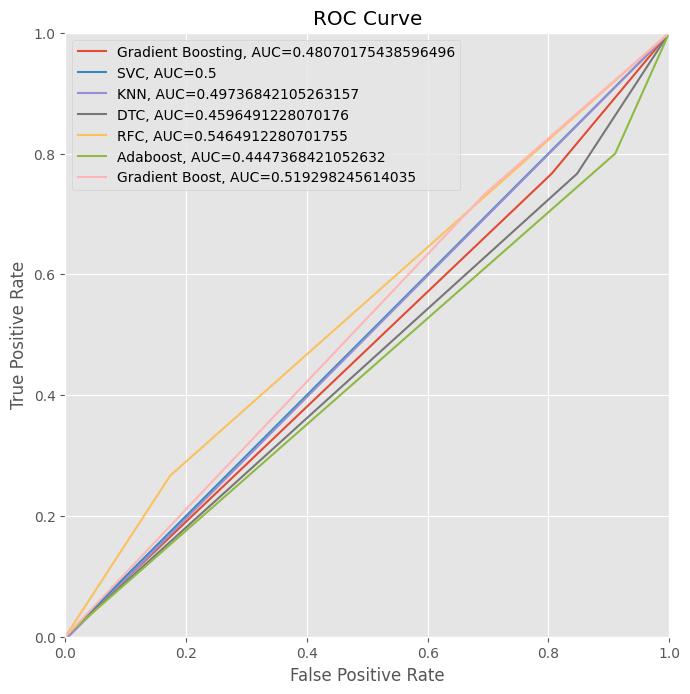

In [94]:
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("ROC Curve")

plt.plot(false_positive_rate_xgb,true_positive_rate_xgb,label="Gradient Boosting, AUC="+str(auc_xgb))
plt.plot(false_positive_rate_svc,true_positive_rate_svc,label="SVC, AUC="+str(auc_svc))
plt.plot(false_positive_rate_knn,true_positive_rate_knn,label="KNN, AUC="+str(auc_knn))
plt.plot(false_positive_rate_dtc,true_positive_rate_dtc,label="DTC, AUC="+str(auc_dtc))
plt.plot(false_positive_rate_rfc,true_positive_rate_rfc,label="RFC, AUC="+str(auc_rfc))
plt.plot(false_positive_rate_abc,true_positive_rate_abc,label="Adaboost, AUC="+str(auc_abc))
plt.plot(false_positive_rate_gbc,true_positive_rate_gbc,label="Gradient Boost, AUC="+str(auc_gbc))

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

**More to do**

https://www.kaggle.com/code/niteshyadav3103/insurance-fraud-detection-using-12-models/notebook

https://medium.com/geekculture/insurance-claims-fraud-detection-using-machine-learning-78f04913097

algos to do:

* Naive Bayes
* stochastic gradient boosting
* cat boost classifier
* extra trees classifier
* lgbm classifier
* voting classifier

In [95]:
X_test=X_test[X_train.columns]

In [96]:
X_test.apply(lambda x: print(x.to_json()), axis=1)

{"policy_csl_250\/500":0,"policy_csl_500\/1000":0,"insured_sex_MALE":0,"insured_education_level_College":1,"insured_education_level_High School":0,"insured_education_level_JD":0,"insured_education_level_MD":0,"insured_education_level_Masters":0,"insured_education_level_PhD":0,"insured_occupation_armed-forces":0,"insured_occupation_craft-repair":0,"insured_occupation_exec-managerial":0,"insured_occupation_farming-fishing":0,"insured_occupation_handlers-cleaners":0,"insured_occupation_machine-op-inspct":0,"insured_occupation_other-service":0,"insured_occupation_priv-house-serv":0,"insured_occupation_prof-specialty":0,"insured_occupation_protective-serv":0,"insured_occupation_sales":0,"insured_occupation_tech-support":1,"insured_occupation_transport-moving":0,"insured_hobbies_basketball":0,"insured_hobbies_board-games":0,"insured_hobbies_bungie-jumping":0,"insured_hobbies_camping":0,"insured_hobbies_chess":1,"insured_hobbies_cross-fit":0,"insured_hobbies_dancing":0,"insured_hobbies_exerci

420    None
571    None
499    None
237    None
426    None
       ... 
728    None
884    None
340    None
784    None
636    None
Length: 250, dtype: object

In [97]:
X_test.head()

policy_csl_250/500  policy_csl_500/1000  insured_sex_MALE  \
420                   0                    0                 0   
571                   1                    0                 0   
499                   0                    0                 0   
237                   0                    1                 1   
426                   0                    1                 1   

     insured_education_level_College  insured_education_level_High School  \
420                                1                                    0   
571                                0                                    0   
499                                0                                    0   
237                                0                                    0   
426                                0                                    0   

     insured_education_level_JD  insured_education_level_MD  \
420                           0                           0   
571                           1                           0   
499                           0                           0   
237                           0                           1   
426                           0                           0   

     insured_education_level_Masters  insured_education_level_PhD  \
420                                0                            0   
571                                0                            0   
499                                0                            1   
237                                0                            0   
426                                1                            0   

     insured_occupation_armed-forces  insured_occupation_craft-repair  \
420                                0                                0   
571                                0                                0   
499                                0                                1   
237                                0                                0   
426                                0                                0   

     insured_occupation_exec-managerial  insured_occupation_farming-fishing  \
420                                   0                                   0   
571                                   0                                   0   
499                                   0                                   0   
237                                   0                                   0   
426                                   0                                   1   

     insured_occupation_handlers-cleaners  \
420                                     0   
571                                     0   
499                                     0   
237                                     0   
426                                     0   

     insured_occupation_machine-op-inspct  insured_occupation_other-service  \
420                                     0                                 0   
571                                     0                                 0   
499                                     0                                 0   
237                                     0                                 0   
426                                     0                                 0   

     insured_occupation_priv-house-serv  insured_occupation_prof-specialty  \
420                                   0                                  0   
571                                   0                                  0   
499                                   0                                  0   
237                                   0                                  0   
426                                   0                                  0   

     insured_occupation_protective-serv  insured_occupation_sales  \
420                                   0                         0   
571                                   0                         0   
499            

In [98]:
dummy_data={"months_as_customer":257,"policy_deductable":1000,"umbrella_limit":0,"capital-gains":52100,"capital-loss":0,"incident_hour_of_the_day":0,"number_of_vehicles_involved":1,"bodily_injuries":0,"witnesses":1,"injury_claim":21330,"property_claim":7110,"vehicle_claim":56880,"policy_csl_250\/500":0,"policy_csl_500\/1000":0,"insured_sex_MALE":0,"insured_education_level_College":0,"insured_education_level_High School":0,"insured_education_level_JD":1,"insured_education_level_MD":0,"insured_education_level_Masters":0,"insured_education_level_PhD":0,"insured_occupation_armed-forces":0,"insured_occupation_craft-repair":0,"insured_occupation_exec-managerial":0,"insured_occupation_farming-fishing":0,"insured_occupation_handlers-cleaners":0,"insured_occupation_machine-op-inspct":0,"insured_occupation_other-service":0,"insured_occupation_priv-house-serv":0,"insured_occupation_prof-specialty":0,"insured_occupation_protective-serv":0,"insured_occupation_sales":0,"insured_occupation_tech-support":0,"insured_occupation_transport-moving":1,"insured_hobbies_basketball":0,"insured_hobbies_board-games":0,"insured_hobbies_bungie-jumping":0,"insured_hobbies_camping":0,"insured_hobbies_chess":0,"insured_hobbies_cross-fit":0,"insured_hobbies_dancing":0,"insured_hobbies_exercise":0,"insured_hobbies_golf":0,"insured_hobbies_hiking":0,"insured_hobbies_kayaking":1,"insured_hobbies_movies":0,"insured_hobbies_paintball":0,"insured_hobbies_polo":0,"insured_hobbies_reading":0,"insured_hobbies_skydiving":0,"insured_hobbies_sleeping":0,"insured_hobbies_video-games":0,"insured_hobbies_yachting":0,"insured_relationship_not-in-family":0,"insured_relationship_other-relative":1,"insured_relationship_own-child":0,"insured_relationship_unmarried":0,"insured_relationship_wife":0,"incident_type_Parked Car":0,"incident_type_Single Vehicle Collision":1,"incident_type_Vehicle Theft":0,"collision_type_Rear Collision":1,"collision_type_Side Collision":0,"incident_severity_Minor Damage":0,"incident_severity_Total Loss":1,"incident_severity_Trivial Damage":0,"authorities_contacted_Fire":0,"authorities_contacted_None":0,"authorities_contacted_Other":0,"authorities_contacted_Police":1,"property_damage_YES":0,"police_report_available_YES":1}
dummpy_pd=pd.DataFrame.from_dict([dummy_data])
dummpy_pd.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
0                 257               1000               0          52100   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0             0                         0                            1   

   bodily_injuries  witnesses  injury_claim  property_claim  vehicle_claim  \
0                0          1         21330            7110          56880   

   policy_csl_250\/500  policy_csl_500\/1000  insured_sex_MALE  \
0                    0                     0                 0   

   insured_education_level_College  insured_education_level_High School  \
0                                0                                    0   

   insured_education_level_JD  insured_education_level_MD  \
0                           1                           0   

   insured_education_level_Masters  insured_education_level_PhD  \
0                                0                            0   

   insured_occupation_armed-forces  insured_occupation_craft-repair  \
0                                0                                0   

   insured_occupation_exec-managerial  insured_occupation_farming-fishing  \
0                                   0                                   0   

   insured_occupation_handlers-cleaners  insured_occupation_machine-op-inspct  \
0                                     0                                     0   

   insured_occupation_other-service  insured_occupation_priv-house-serv  \
0                                 0                                   0   

   insured_occupation_prof-specialty  insured_occupation_protective-serv  \
0                                  0                                   0   

   insured_occupation_sales  insured_occupation_tech-support  \
0                         0                                0   

   insured_occupation_transport-moving  insured_hobbies_basketball  \
0                                    1                           0   

   insured_hobbies_board-games  insured_hobbies_bungie-jumping  \
0                            0                               0   

   insured_hobbies_camping  insured_hobbies_chess  insured_hobbies_cross-fit  \
0                        0                      0                          0   

   insured_hobbies_dancing  insured_hobbies_exercise  insured_hobbies_golf  \
0                        0                         0                     0   

   insured_hobbies_hiking  insured_hobbies_kayaking  insured_hobbies_movies  \
0                       0                         1                       0   

   insured_hobbies_paintball  insured_hobbies_polo  insured_hobbies_reading  \
0                          0                     0                        0   

   insured_hobbies_skydiving  insured_hobbies_sleeping  \
0                          0                         0   

   insured_hobbies_video-games  insured_hobbies_yachting  \
0                            0                         0   

   insured_relationship_not-in-family  insured_relationship_other-relative  \
0                                   0                                    1   

   insured_relationship_own-child  insured_relationship_unmarried  \
0                               0                               0   

   insured_relationship_wife  incident_type_Parked Car  \
0                          0                         0   

   incident_type_Single Vehicle Collision  incident_type_Vehicle Theft  \
0                                       1                            0   

   collision_type_Rear Collision  collision_type_Side Collision  \
0                              1                              0   

   incident_severity_Minor Damage  incident_severity_Total Loss  \
0                               0                             1   

   incident_severity_Trivial Damage  authorities_contacted_Fire  \
0                                 0                           0

In [99]:
svc.predict(dummpy_pd)

array([0])

In [100]:
svc.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [101]:
dummy_test_df=dummpy_pd.select_dtypes(include=['object'])
dummy_test_df.head()

Empty DataFrame
Columns: []
Index: [0]